In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final_internship_data.csv to final_internship_data (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('final_internship_data.csv')
print(df.shape)
df.head()


(500000, 26)


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')


In [ ]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['year'] = df['pickup_datetime'].dt.year

In [ ]:
df = df[(df['fare_amount'] > 0)]

In [ ]:
df = df[(df['distance'] > 0.1)]

In [ ]:
df = df[(df['bearing'] >= -180) & (df['bearing'] <= 180)]


In [ ]:
print(df.shape)
df.describe()


(482752, 26)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,482752.000000,482752,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000,482752.000000
mean,11.315575,2012-03-23 09:44:23.070097920,-1.288896,0.709487,-1.288941,0.709419,1.685107,13.517788,15.681772,6.268958,3.041330,2011.745696,75.726201,69.560070,53.462298,52.796453,45.060636,20.145980,0.306701
min,0.010000,2009-01-01 00:31:32,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.690427,0.382119,0.532545,0.211811,0.100018,-3.141593
25%,6.000000,2010-08-20 14:59:00,-1.291409,0.710986,-1.291396,0.710969,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.325855,32.126300,17.058867,14.815490,7.077595,1.295173,-0.893362
50%,8.500000,2012-03-22 20:16:30,-1.291231,0.711280,-1.291205,0.711289,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.488420,34.671405,19.508309,18.205663,10.321993,2.196356,-0.125533
75%,12.500000,2013-10-22 20:26:15,-1.290993,0.711526,-1.290939,0.711543,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.689052,38.050710,22.033346,22.135296,14.166895,3.993654,2.256217
max,495.000000,2015-06-30 23:38:21,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593
std,9.525053,NaN,0.117951,0.106461,0.116043,0.089474,1.308549,6.508044,8.681459,3.439131,1.948697,1.863788,793.615499,795.345589,795.266491,795.473494,795.713852,373.576651,1.829911


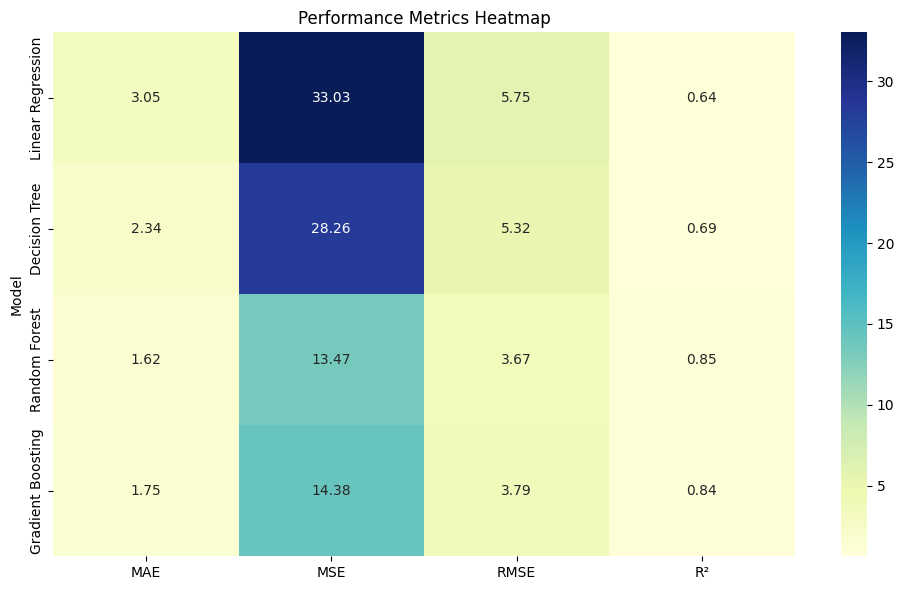

In [56]:
metrics_df = df_results.set_index('Model')[['MAE', 'MSE', 'RMSE', 'R²']]

plt.figure(figsize=(10,6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Performance Metrics Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
df = df[(df['distance'] > 0.1) & (df['distance'] < 500)]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# اختار فقط المتغيرات الرقمية
X_num = X_train[numerical_cols].copy()

# نضيف constant column (مطلوب لحساب VIF)
X_num_const = add_constant(X_num)

# نحسب الـ VIF لكل عمود
vif = pd.DataFrame()
vif["feature"] = X_num_const.columns
vif["VIF"] = [variance_inflation_factor(X_num_const.values, i) for i in range(X_num_const.shape[1])]

print(vif)


            feature           VIF
0             const  1.183839e+06
1   passenger_count  1.002275e+00
2              hour  1.011349e+00
3               day  1.000826e+00
4             month  1.014256e+00
5           weekday  1.012097e+00
6              year  1.014631e+00
7          jfk_dist  4.128700e+04
8          ewr_dist  3.506809e+05
9          lga_dist  3.854132e+04
10         sol_dist  1.728512e+06
11         nyc_dist  9.230848e+05
12         distance  1.474846e+00
13          bearing  1.010663e+00


In [ ]:
print(df.columns)


Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [ ]:
selected_columns = [
    'fare_amount', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
    'Car Condition', 'Weather', 'Traffic Condition',
    'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist',
    'distance', 'bearing'
]

df = df[selected_columns]
print(df.shape)
df.head()


(481760, 17)


,fare_amount,passenger_count,hour,day,month,weekday,year,Car Condition,Weather,Traffic Condition,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,4.5,1,17,15,6,0,2009,Very Good,windy,Congested Traffic,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,16.9,1,16,5,1,1,2010,Excellent,cloudy,Flow Traffic,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,5.7,2,0,18,8,3,2011,Bad,stormy,Congested Traffic,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,7.7,1,4,21,4,5,2012,Very Good,stormy,Flow Traffic,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,5.3,1,7,9,3,1,2010,Bad,stormy,Congested Traffic,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
categorical_cols = ['Car Condition', 'Weather', 'Traffic Condition']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = ['Car Condition', 'Weather', 'Traffic Condition']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [ ]:
print(X_train_preprocessed.shape, X_test_preprocessed.shape)


(385408, 25) (96352, 25)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by='RMSE'))


               Model       MAE        MSE      RMSE        R²
2      Random Forest  1.624606  13.465275  3.669506  0.853351
3  Gradient Boosting  1.753011  14.382948  3.792486  0.843357
1      Decision Tree  2.343456  28.258339  5.315857  0.692242
0  Linear Regression  3.051880  33.028134  5.747011  0.640295


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 1. Define the model
rf = RandomForestRegressor(random_state=42)

# 2. Create parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# 3. Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,       # Cross-validation
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

# 4. Fit search
random_search.fit(X_train_preprocessed, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1
)

random_search.fit(X_train_preprocessed, y_train)

best_model = random_search.best_estimator_
print(" Best Parameters:", random_search.best_params_)

y_pred = best_model.predict(X_test_preprocessed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Evaluation on Test Data:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 8.7min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 8.4min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time= 9.0min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 7.8min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 7.8min
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 8.0min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 4.7min
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 4.6min


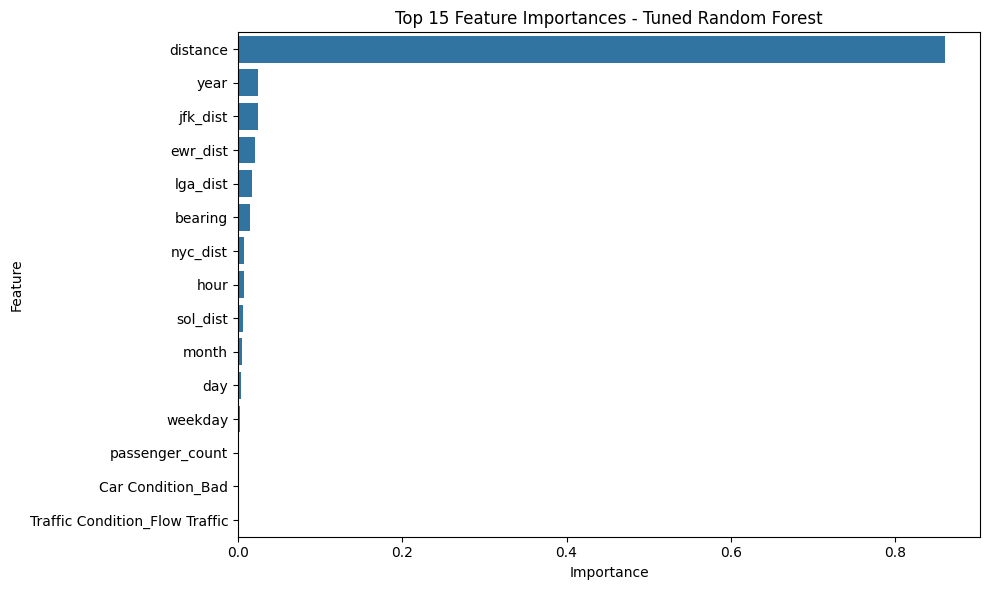

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
importances = best_model.feature_importances_

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

all_feature_names = np.concatenate([numerical_cols, ohe_feature_names])

feat_imp = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15))
plt.title("Top 15 Feature Importances - Tuned Random Forest")
plt.tight_layout()
plt.show()


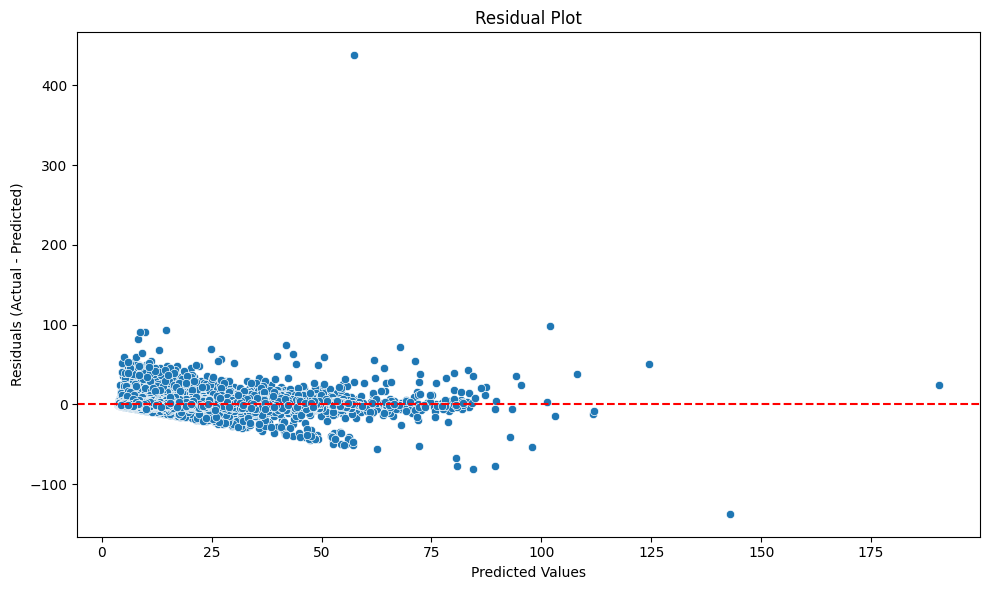

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()


In [50]:
!pip install xgboost


In [51]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

xgb_model.fit(X_train_preprocessed, y_train)

y_pred_xgb = xgb_model.predict(X_test_preprocessed)

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


XGBoost Performance:
MAE:  1.5932
MSE:  12.6876
RMSE: 3.5620
R²:   0.8618


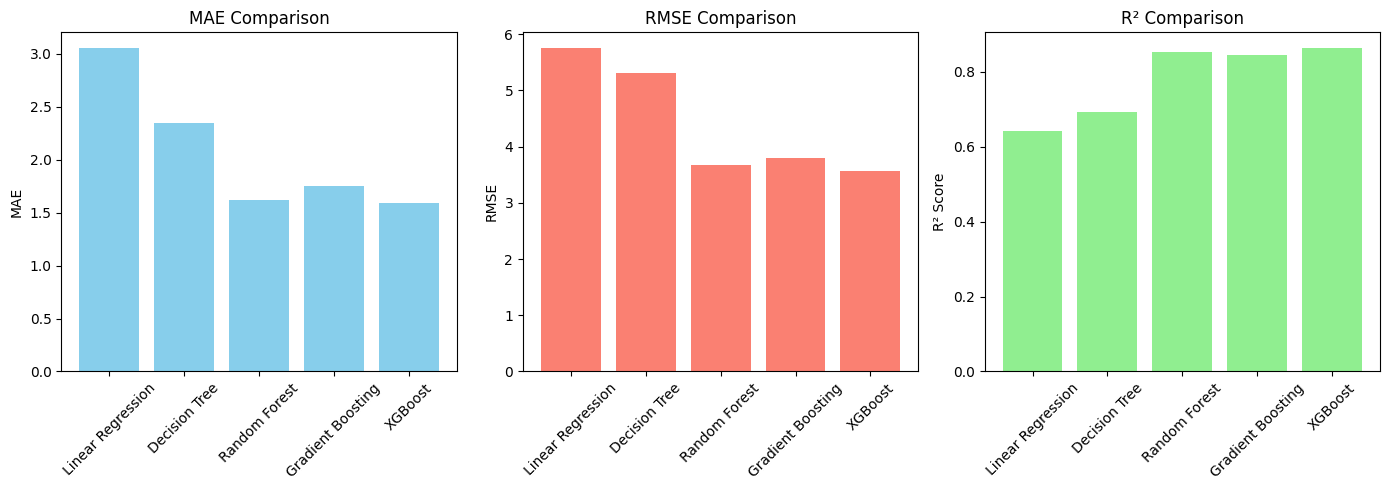

In [52]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
mae = [3.0519, 2.3435, 1.6246, 1.7530, 1.5932]
rmse = [5.7470, 5.3159, 3.6695, 3.7925, 3.5620]
r2 = [0.6403, 0.6922, 0.8534, 0.8434, 0.8618]

x = range(len(models))

plt.figure(figsize=(14, 5))

# MAE Plot
plt.subplot(1, 3, 1)
plt.bar(x, mae, color='skyblue')
plt.xticks(x, models, rotation=45)
plt.title('MAE Comparison')
plt.ylabel('MAE')

# RMSE Plot
plt.subplot(1, 3, 2)
plt.bar(x, rmse, color='salmon')
plt.xticks(x, models, rotation=45)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# R² Plot
plt.subplot(1, 3, 3)
plt.bar(x, r2, color='lightgreen')
plt.xticks(x, models, rotation=45)
plt.title('R² Comparison')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


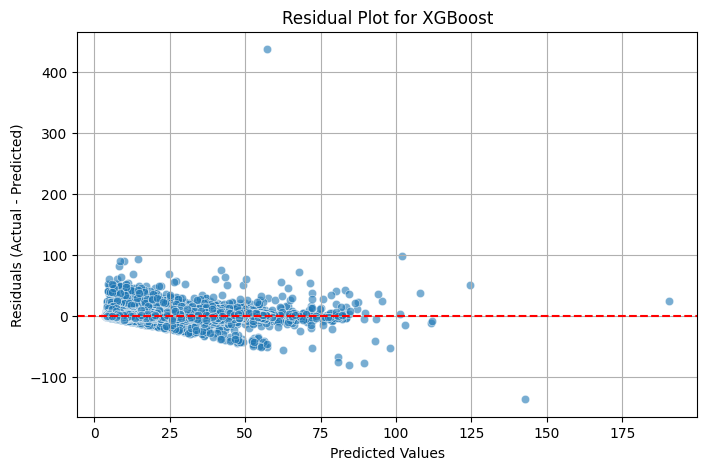

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


residuals = y_test - y_pred

plt.figure(figsize=(8, 5))

sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for XGBoost')
plt.grid(True)
plt.show()
